In [1]:
"""Test the package of orthogonal polynomials using aribitary measure. Link: https://github.com/j-jith/orthopoly#id1"""
import numpy as np
import numpy.polynomial.polynomial as nppoly
from ortho2sig import OrthoPoly, Sig2path
import matplotlib.pyplot as plt

### Orthogonal polynomials

In [2]:
# Legendre polynomial
pdf_l = lambda z: 1.0
intlims = [-1, 1]
order = 10
pp = OrthoPoly(pdf_l, intlims=intlims)
pp.gen_poly(order)

pp.poly

[array([0.70710678]),
 array([0.        , 1.22474487]),
 array([-0.79056942,  0.        ,  2.37170825]),
 array([ 0.        , -2.80624304,  0.        ,  4.67707173]),
 array([ 0.79549513,  0.        , -7.95495129,  0.        ,  9.2807765 ]),
 array([  0.        ,   4.39726477,   0.        , -20.52056895,
          0.        ,  18.46851205]),
 array([ -0.7967218 ,   0.        ,  16.73115778,   0.        ,
        -50.19347334,   0.        ,  36.80854711]),
 array([   0.        ,   -5.99071547,    0.        ,   53.91643925,
           0.        , -118.61616636,    0.        ,   73.42905537]),
 array([   0.79720045,    0.        ,  -28.69921636,    0.        ,
         157.84568997,    0.        , -273.59919594,    0.        ,
         146.57099783]),
 array([   0.        ,    7.58511879,    0.        , -111.24840896,
           0.        ,  433.86879494,    0.        , -619.8125642 ,
           0.        ,  292.68926643]),
 array([-7.97434891e-01,  0.00000000e+00,  4.38589190e+01,  0.000

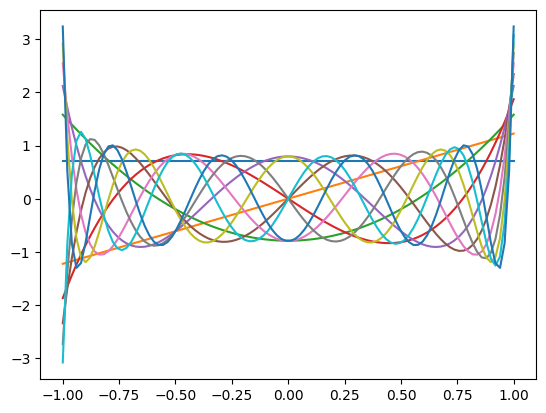

In [3]:
xx = np.linspace(-1, 1, 100)
for p_i in pp.poly:
    plt.plot(xx, nppoly.polyval(xx, p_i))
plt.show()

In [4]:
# # check normal
# for i in range(order+1):
#     print(1-pp.integrate(nppoly.polypow(pp.poly[i], 2), intlims[0], intlims[1]))

# # check orth
# for i in range(order):
#     for j in range(i+1, order+1):
#         print(f'--------order {i}, {j}-----------')
#         print(pp.integrate(nppoly.polymul(pp.poly[i], pp.poly[j]), intlims[0], intlims[1]))

In [5]:
# test coefficients of orthogonal polynomials
coeff_order = 15
t_grid = np.linspace(-1, 1, 200)
example_path = lambda t: np.cos(15*t) - np.sin(3*t) - (np.cos(-15) - np.sin(-3))
print(pp.a(example_path, coeff_order)-pp.a(example_path(t_grid), coeff_order))

[ 1.16157978e-04 -5.83264050e-05  2.71071113e-04 -6.68644536e-05
  3.99098428e-04 -3.36237049e-05  5.46328473e-04  4.54781760e-05
  7.28196057e-04  1.76014279e-04  9.53955123e-04  3.63413967e-04
  1.23005433e-03  6.12680880e-04  1.56109474e-03]


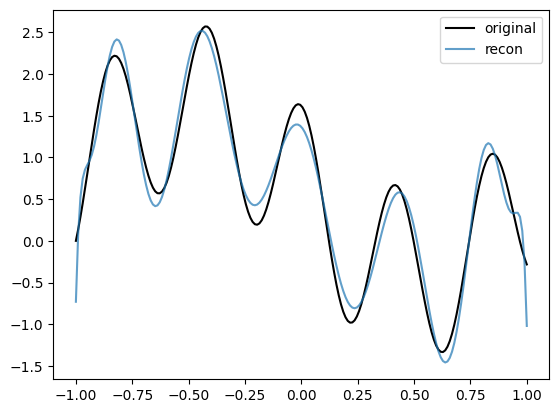

In [6]:
plt.plot(t_grid, example_path(t_grid), color='black', label='original')
plt.plot(t_grid, pp.path_eval(t_grid, example_path(t_grid), coeff_order), label='recon', alpha=0.7)
plt.legend()

In [7]:
# scaled Hermite polynomial
pdf_h = lambda z: np.exp(-z**2/2/0.05)
intlims = [-1, 1]
order = 10
pp = OrthoPoly(pdf_h, intlims=intlims)
pp.gen_poly(order)

pp.poly

[array([1.33571626]),
 array([0.        , 5.97398863]),
 array([-0.94514521,  0.        , 18.90596697]),
 array([ 0.        , -7.34650596,  0.        , 49.02966688]),
 array([  0.82867653,   0.        , -33.2804813 ,   0.        ,
        111.48218939]),
 array([   0.        ,    8.49788585,    0.        , -114.80157988,
           0.        ,  233.3603546 ]),
 array([  -0.79416586,    0.        ,   48.94191812,    0.        ,
        -337.14035184,    0.        ,  468.13901774]),
 array([   0.        ,   -9.94559612,    0.        ,  209.91302497,
           0.        , -896.57821377,    0.        ,  925.58713208]),
 array([ 7.93622660e-01,  0.00000000e+00, -6.85590568e+01,  0.00000000e+00,
         7.51658135e+02,  0.00000000e+00, -2.23928757e+03,  0.00000000e+00,
         1.82878488e+03]),
 array([    0.        ,    11.55082216,     0.        ,  -346.48795804,
            0.        ,  2389.40296973,     0.        , -5367.27060694,
            0.        ,  3625.00016211]),
 array([-7.

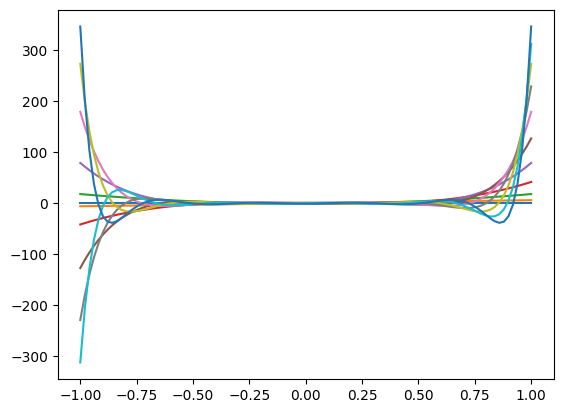

In [8]:
xx = np.linspace(-1, 1, 100)
for p_i in pp.poly:
    plt.plot(xx, nppoly.polyval(xx, p_i))
plt.show()

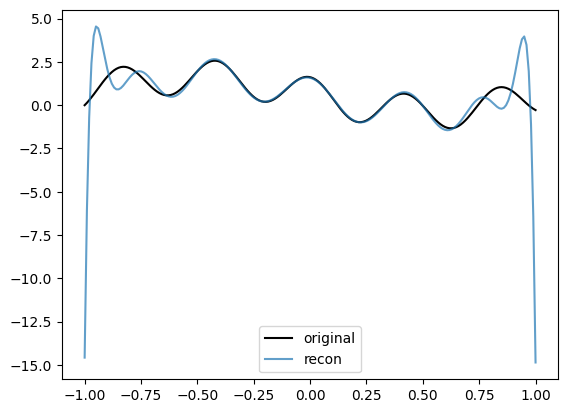

In [9]:
plt.plot(t_grid, example_path(t_grid), color='black', label='original')
plt.plot(t_grid, pp.path_eval(t_grid, example_path(t_grid), coeff_order), label='recon', alpha=0.7)
plt.legend()

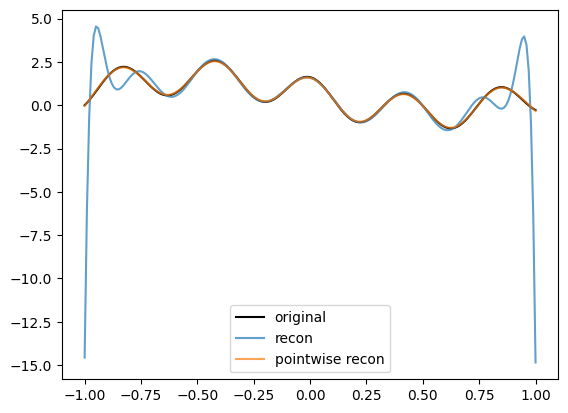

In [10]:
# pointwise reconstruction
def pdf_hermite(t, params):
    t0, eps = params
    return np.exp(-(t-t0)**2/2/eps**2) / eps

pointwise_order = 3
pointwise_poly = np.zeros_like(t_grid)

for i, t in enumerate(t_grid):
    hermite = OrthoPoly(pdf_hermite, margs=[t, 0.05])
    pointwise_poly[i] = hermite.path_eval(t, example_path, pointwise_order)

plt.plot(t_grid, example_path(t_grid), color='black', label='original')
plt.plot(t_grid, pp.path_eval(t_grid, example_path, coeff_order), label='recon', alpha=0.7)
plt.plot(t_grid, pointwise_poly, label='pointwise recon', alpha=0.7)
plt.legend()

### Signatures

In [11]:
length = 200
t_grid = np.linspace(-1, 1, length)
N = 15

# inversion via legendre
inv1 = Sig2path(pdf_l, t_grid=t_grid)
rec = inv1.recover(t_grid, example_path(t_grid), N)

In [12]:
a_arr = inv1.poly_class.a(example_path, N)
a_sig = np.array([inv1._a_sig(inv1.sig(example_path(t_grid), N), n) for n in range(N)])
print(a_arr-a_sig)

[ 1.16157978e-04 -6.41456522e-05  1.95683175e-04  4.30941542e-05
  2.12432264e-05 -5.83032891e-06 -4.41150825e-04  3.38806032e-07
 -7.94268633e-04 -1.28650471e-08 -2.18008306e-05  1.03095554e-08
  1.16781017e-03  3.28831437e-07 -1.00429403e-03]


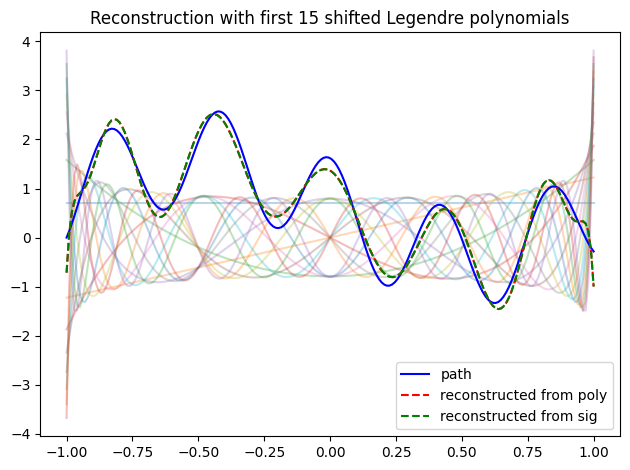

In [13]:
for p_i in inv1.poly_class.poly:
    plt.plot(t_grid, nppoly.polyval(t_grid, p_i), alpha=0.3)
plt.plot(t_grid, example_path(t_grid), label='path', c='blue')
plt.plot(t_grid, inv1.poly_class.path_eval(t_grid, example_path, N), label='reconstructed from poly', c='red', linestyle='--')
plt.plot(t_grid, rec, label='reconstructed from sig', c='g', linestyle='--')
plt.legend()
plt.title(f'Reconstruction with first {N} shifted Legendre polynomials')
plt.tight_layout()

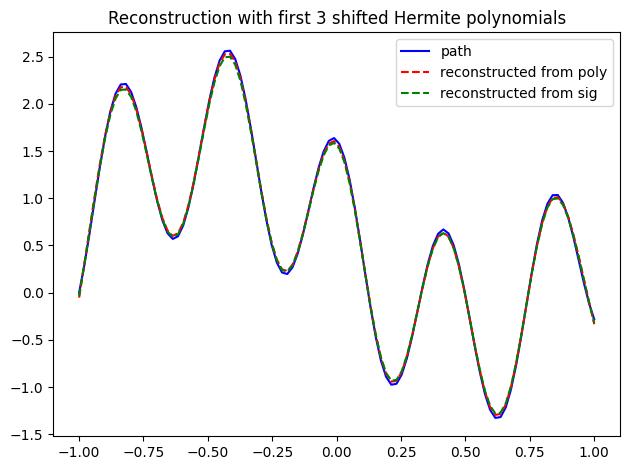

In [14]:
# inversion via Hermite
pointwise_order = 3
t_grid = np.linspace(-1, 1, 100)

pointwise_poly = np.zeros_like(t_grid)
pointwise_sig = np.zeros_like(t_grid)
for i, t in enumerate(t_grid):
    inv2 = Sig2path(pdf_hermite, margs=[t, 0.05])
    pointwise_poly[i] = inv2.poly_class.path_eval(t, example_path, pointwise_order)
    pointwise_sig[i] = inv2.recover(t, example_path(t_grid), pointwise_order)
    # a_arr = inv2.poly_class.a(example_path, pointwise_order)
    # a_sig = np.array([inv2._a_sig(inv2.sig(example_path(t_grid), pointwise_order), n) for n in range(pointwise_order)])
    # print(a_arr-a_sig)

plt.plot(t_grid, example_path(t_grid), label='path', c='blue')
plt.plot(t_grid, pointwise_poly, label='reconstructed from poly', c='red', linestyle='--')
plt.plot(t_grid, pointwise_sig, label='reconstructed from sig', c='g', linestyle='--')
plt.legend()
plt.title(f'Reconstruction with first {pointwise_order} shifted Hermite polynomials')
plt.tight_layout()